In [ ]:
!pip install altair

In [ ]:
!pip install ipywidgets

In [ ]:
!pip install DBUtils

In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import linear_model
import altair as alt
from matplotlib import pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout, jslink, IntText, IntSlider

### Load Expenditure and Income datasets

In [5]:
memi171x_df = pd.read_csv("dataset/memi171x.csv", header=0)
memi172_df = pd.read_csv("dataset/memi172.csv", header=0)
memi173_df = pd.read_csv("dataset/memi173.csv", header=0)
memi174_df = pd.read_csv("dataset/memi174.csv", header=0)


In [6]:
fmli171x_df = pd.read_csv("dataset/fmli171x.csv", header=0)
fmli172_df = pd.read_csv("dataset/fmli172.csv", header=0)
fmli173_df = pd.read_csv("dataset/fmli173.csv", header=0)
fmli174_df = pd.read_csv("dataset/fmli174.csv", header=0)

### Validate NEWID in FMLI and MEMI files

In [7]:
df_171x = memi171x_df.groupby(['NEWID']).count()['AGE'].reset_index()
df_172 = memi172_df.groupby(['NEWID']).count()['AGE'].reset_index()
df_173 = memi173_df.groupby(['NEWID']).count()['AGE'].reset_index()
df_174 = memi174_df.groupby(['NEWID']).count()['AGE'].reset_index()

df_1_2 = df_171x.join(df_172, how='inner', on='NEWID', rsuffix='_other')
print("df_1_2:",df_1_2.shape)

df_2_3 = df_172.join(df_173, how='inner', on='NEWID', rsuffix='_other')
print("df_2_3:",df_2_3.shape)

df_3_4 = df_173.join(df_174, how='inner', on='NEWID', rsuffix='_other')
print("df_3_4:",df_3_4.shape)

df_1_2: (0, 4)
df_2_3: (0, 4)
df_3_4: (0, 4)


In [8]:
df_171x_mem = memi171x_df.groupby(['NEWID']).count()['AGE'].reset_index()
df_171x_fml = fmli171x_df.groupby(['NEWID']).count()['AGE2'].reset_index()

df_171x_mem_fml = df_171x_mem.join(df_171x_fml, how='inner', on='NEWID', rsuffix='_other')
print("df_171x_mem_fml:", df_171x_mem_fml.shape)

df_171x_mem_fml: (0, 4)


In [9]:
df_172_mem = memi172_df.groupby(['NEWID']).count()['AGE'].reset_index()
df_172_fml = fmli172_df.groupby(['NEWID']).count()['AGE2'].reset_index()

df_172_mem_fml = df_172_mem.join(df_172_fml, how='inner', on='NEWID', rsuffix='_other')
print("df_172_mem_fml:", df_172_mem_fml.shape)

df_172_mem_fml: (0, 4)


In [10]:
newid_list = set(memi171x_df['NEWID'].unique())
print(len(newid_list))

6208


In [11]:
mem_list = list(memi171x_df['NEWID'].unique())\
           +list(memi172_df['NEWID'].unique())\
           +list(memi173_df['NEWID'].unique())\
           +list(memi174_df['NEWID'].unique())
print(len(mem_list))        

24479


In [12]:
fml_list = list(fmli171x_df['NEWID'].unique())\
           +list(fmli172_df['NEWID'].unique())\
           +list(fmli173_df['NEWID'].unique())\
           +list(fmli174_df['NEWID'].unique())
print(len(fml_list))  

24479


In [13]:
join_list = set(mem_list) & set(fml_list)
print(len(join_list))

24479


In [14]:
#get the columns not in memi171x_df 
set(memi172_df.columns) - set(memi171x_df.columns) 

{'TRANAMTX', 'TRANDAYX', 'TRANPD', 'TRANPD_', 'TRAN_AYX', 'TRAN_MTX'}

### Clean up MEMI data

In [15]:
#remove the 6 columns from all member dataframe
memi172_df = memi172_df.drop(columns=['TRANAMTX', 'TRANDAYX', 'TRANPD', 'TRANPD_', 'TRAN_AYX', 'TRAN_MTX'])
memi173_df = memi173_df.drop(columns=['TRANAMTX', 'TRANDAYX', 'TRANPD', 'TRANPD_', 'TRAN_AYX', 'TRAN_MTX'])
memi174_df = memi174_df.drop(columns=['TRANAMTX', 'TRANDAYX', 'TRANPD', 'TRANPD_', 'TRAN_AYX', 'TRAN_MTX'])
print(set(memi172_df.columns) - set(memi171x_df.columns))
print(set(memi173_df.columns) - set(memi171x_df.columns))
print(set(memi174_df.columns) - set(memi171x_df.columns))




set()
set()
set()


In [16]:
memi_full= pd.concat([memi171x_df, memi172_df, memi173_df, memi174_df])
print(memi_full.shape)

(59474, 181)


In [17]:
#all SALARYX_
memi_full[(memi_full['SALARYX_']=='D')].shape

(18885, 181)

In [18]:
#only "D" is valid 'SALARYX_". set invalid 'SALARYX' to 0, 
memi_full.loc[memi_full['SALARYX_'] != "D", "SALARYX"] = 0
#validate the assignment
print(memi_full[(memi_full['SALARYX_']!='D') & (memi_full['SALARYX'])>0][['SALARYX_', 'SALARYX']])

#only "D" is valid 'SEMP_RMX". set invalid 'SEMPFRMX' to 0, 
memi_full.loc[memi_full['SEMP_RMX'] != "D", "SEMPFRMX"] = 0
#validate the assignment
print(memi_full[(memi_full['SEMP_RMX']!='D') & (memi_full['SEMPFRMX'])>0][['SEMP_RMX', 'SEMPFRMX']])


#only "D" is valid 'SOCRRX_". set invalid 'SOCRRX' to 0, 
memi_full.loc[memi_full['SOCRRX_'] != "D", "SOCRRX"] = 0
#validate the assignment
print(memi_full[(memi_full['SOCRRX_']!='D') & (memi_full['SOCRRX'])>0][['SOCRRX_', 'SOCRRX']])

#only "D" is valid 'SSIX_". set invalid 'SSIX' to 0, 
memi_full.loc[memi_full['SSIX_'] != "D", "SSIX"] = 0
#validate the assignment
print(memi_full[(memi_full['SSIX_']!='D') & (memi_full['SSIX'])>0][['SSIX_', 'SSIX']])

Empty DataFrame
Columns: [SALARYX_, SALARYX]
Index: []
Empty DataFrame
Columns: [SEMP_RMX, SEMPFRMX]
Index: []
Empty DataFrame
Columns: [SOCRRX_, SOCRRX]
Index: []
Empty DataFrame
Columns: [SSIX_, SSIX]
Index: []


In [19]:
# each NEWID, aggregated 4 income sources.
memi_sum = memi_full.groupby("NEWID").agg({'SALARYX':'sum', 'SEMPFRMX':'sum',  'SOCRRX':'sum', 'SSIX':'sum'} )

In [20]:
print(fmli171x_df.shape)
print(fmli172_df.shape)
print(fmli173_df.shape)
print(fmli174_df.shape)

(6208, 808)
(6177, 828)
(6090, 828)
(6004, 828)


### Clean up FMLI data

In [21]:
fml_cols_remove = list(set(fmli172_df.columns) - set(fmli171x_df.columns))
print(fml_cols_remove)

['LIQUDYR', 'OTHLNYR_', 'LIQUID_', 'SOLARPNL', 'STDNTYR', 'IRAYR_', 'SOLA_PNL', 'WHLFYR_', 'IRA_', 'WHLFYR', 'OTHSTYR', 'OTHSTYR_', 'CREDYR_', 'CREDYR', 'FSTAXOWE', 'LIQUDYR_', 'STOCKYR', 'LIQUID', 'OTHLNYR', 'FFTAXOWE', 'STDNTYR_', 'IRA', 'IRAYR', 'STOCKYR_']


In [22]:
#remove the 6 columns from all member dataframe
fmli172_df = fmli172_df.drop(columns=fml_cols_remove)
fmli173_df = fmli173_df.drop(columns=fml_cols_remove)
fmli174_df = fmli174_df.drop(columns=fml_cols_remove)
print(set(fmli172_df.columns) - set(fmli171x_df.columns))
print(set(fmli173_df.columns) - set(fmli171x_df.columns))
print(set(fmli174_df.columns) - set(fmli171x_df.columns))

set()
set()
set()


In [23]:
fmli_full= pd.concat([fmli171x_df, fmli172_df, fmli173_df, fmli174_df])
print(fmli_full.shape)

(24479, 808)


In [24]:
def processMortgage(row):
    total = 0
    
    if row.MRTINTCQ >0:
        total +=row.MRTINTCQ
    else:
        total +=row.MRTINTPQ
        
    if row.RNTXRPCQ >0:
        total +=row.RNTXRPCQ
    else:
        total +=row.RNTXRPPQ
        
    if row.PROPTXCQ >0:
        total +=row.PROPTXCQ
    else:
        total +=row.PROPTXPQ
   
    return total*4

fmli_full['Mortgage_Rent_Property_Tax'] = fmli_full.apply(processMortgage, axis=1)

In [25]:
fmli_mortgage = fmli_full[['NEWID', 'MRTINTCQ', 'MRTINTPQ', 'RNTXRPCQ', 'RNTXRPPQ', 'PROPTXCQ', 'PROPTXPQ', 'Mortgage_Rent_Property_Tax']]
fmli_mortgage.head(5)

,NEWID,MRTINTCQ,MRTINTPQ,RNTXRPCQ,RNTXRPPQ,PROPTXCQ,PROPTXPQ,Mortgage_Rent_Property_Tax
0,3386764,0.0,0.0,0.0,1510.0,0.0,0.0,6040.0
1,3386774,0.0,0.0,0.0,1689.0,0.0,0.0,6756.0
2,3386804,0.0,0.0,0.0,3300.0,0.0,0.0,13200.0
3,3386874,0.0,6717.0,0.0,0.0,0.0,350.0,28268.0
4,3386884,0.0,394.0,0.0,0.0,0.0,750.0,4576.0


In [26]:
def processHouseholdFurnishing(row):
    if row.HOUSEQCQ >0:
        return row.HOUSEQCQ*4
    else:
        return row.HOUSEQPQ*4
    
fmli_full['Household_Furnishings_Equipment'] = fmli_full.apply(processHouseholdFurnishing, axis=1)

def processHouseholdOps(row):
    if row.HOUSOPCQ >0:
        return row.HOUSOPCQ*4
    else:
        return row.HOUSOPPQ*4
    
fmli_full['Household_Operations'] = fmli_full.apply(processHouseholdOps, axis=1)


def processUtilities(row):
    if row.UTILCQ >0:
        return row.UTILCQ*4
    else:
        return row.UTILPQ*4
    
fmli_full['Utilities'] = fmli_full.apply(processUtilities, axis=1)


In [27]:
def processVehiclePurchases(row):
    total = 0
    
    if row.CARTKNCQ >0:
        total +=row.CARTKNCQ
    else:
        total +=row.CARTKNPQ
        
    if row.CARTKUCQ >0:
        total +=row.CARTKUCQ
    else:
        total +=row.CARTKUPQ
        
    if row.OTHVEHCQ >0:
        total +=row.OTHVEHCQ
    else:
        total +=row.OTHVEHPQ
   
    return total*4

fmli_full['Vehicle_Purchases'] = fmli_full.apply(processVehiclePurchases, axis=1)
        

In [28]:
 def processGas(row):
    if row.GASMOCQ >0:
        return row.GASMOCQ*4
    else:
        return row.GASMOPQ*4
    
fmli_full['Gasoline_Other_fuels_motor_oil'] = fmli_full.apply(processGas, axis=1)

def processVehicleExpenses(row):
    total = 0
    
    if row.VEHFINCQ >0:
        total +=row.VEHFINCQ
    else:
        total +=row.VEHFINPQ
        
    if row.MAINRPCQ >0:
        total +=row.MAINRPCQ
    else:
        total +=row.MAINRPPQ
        
    if row.VEHINSCQ >0:
        total +=row.VEHINSCQ
    else:
        total +=row.VEHINSPQ

    if row.VRNTLOCQ >0:
        total +=row.VRNTLOCQ
    else:
        total +=row.VRNTLOPQ
   
    return total*4

fmli_full['Other_vehicle_expenses'] = fmli_full.apply(processVehicleExpenses, axis=1)


In [29]:
def processPublicTransportation(row):
    if row.PUBTRACQ >0:
        return row.PUBTRACQ*4
    else:
        return row.PUBTRAPQ*4
    
fmli_full['Public_other_transportation'] = fmli_full.apply(processPublicTransportation, axis=1)

def processHealthInsurance(row):
    if row.HLTHINCQ >0:
        return row.HLTHINCQ*4
    else:
        return row.HLTHINPQ*4
    
fmli_full['Health_Insurance'] = fmli_full.apply(processHealthInsurance, axis=1)

def processMedicalServices(row):
    if row.MEDSRVCQ >0:
        return row.MEDSRVCQ*4
    else:
        return row.MEDSRVPQ*4
    
fmli_full['Medical_Services'] = fmli_full.apply(processMedicalServices, axis=1)

def processPersonalInsurance(row):
    if row.LIFINSCQ >0:
        return row.LIFINSCQ*4
    else:
        return row.LIFINSPQ*4
fmli_full['Personal_Insurance'] = fmli_full.apply(processPersonalInsurance, axis=1)

    
def processMedicalSupplies(row):
    if row.MEDSUPCQ >0:
        return row.MEDSUPCQ*4
    else:
        return row.MEDSUPPQ*4
fmli_full['Medical_Supplies'] = fmli_full.apply(processMedicalSupplies, axis=1)

def processPrescriptionDrugs(row):
    if row.PREDRGCQ >0:
        return row.PREDRGCQ*4
    else:
        return row.PREDRGPQ*4
fmli_full['Prescription_Drugs'] = fmli_full.apply(processPrescriptionDrugs, axis=1)
            
def processPensionSS(row):
    if row.RETPENCQ >0:
        return row.RETPENCQ*4
    else:
        return row.RETPENPQ*4
    
fmli_full['Pensions_and_Social_Security'] = fmli_full.apply(processPensionSS, axis=1)

def processFoodAtHome(row):
    if row.FDHOMECQ >0:
        return row.FDHOMECQ*4
    else:
        return row.FDHOMEPQ*4
    
fmli_full['Food_At_Home'] = fmli_full.apply(processFoodAtHome, axis=1)

def processFoodAwayFromHome(row):
    if row.FDAWAYCQ >0:
        return row.FDAWAYCQ*4
    else:
        return row.FDAWAYPQ*4
    
fmli_full['Food_Away_From_Home'] = fmli_full.apply(processFoodAwayFromHome, axis=1)

           
            

In [30]:
def processApparelServices(row):
    if row.APPARCQ >0:
        return row.APPARCQ*4
    else:
        return row.APPARPQ*4
    
fmli_full['Apparel_and_services'] = fmli_full.apply(processApparelServices, axis=1)        


def processPersonalCare(row):
    if row.PERSCACQ >0:
        return row.PERSCACQ*4
    else:
        return row.PERSCAPQ*4
    
fmli_full['Personal_Care'] = fmli_full.apply(processPersonalCare, axis=1)        
            
def processEducation(row):
    if row.EDUCACQ >0:
        return row.EDUCACQ*4
    else:
        return row.EDUCAPQ*4
    
fmli_full['Education'] = fmli_full.apply(processEducation, axis=1)            
            
def processCashContributions(row):
    if row.CASHCOCQ >0:
        return row.CASHCOCQ*4
    else:
        return row.CASHCOPQ*4
    
fmli_full['Cash_Contributions'] = fmli_full.apply(processCashContributions, axis=1)
            
            
            
def processMiscellaneous(row):
    if row.MISCCQ >0:
        return row.MISCCQ*4
    else:
        return row.MISCPQ*4
    
fmli_full['Miscellaneous'] = fmli_full.apply(processMiscellaneous, axis=1)
            
def processEntertainment(row):
    if row.ENTERTCQ >0:
        return row.ENTERTCQ*4
    else:
        return row.ENTERTPQ*4
    
fmli_full['Entertainment'] = fmli_full.apply(processEntertainment, axis=1)

            
def processTravel(row):
    if row.TTOTALC >0:
        return row.TTOTALC*4
    else:
        return row.TTOTALP*4
    
fmli_full['Travel'] = fmli_full.apply(processTravel, axis=1)
            

In [31]:
def column_fillna(colname):
    null_records = fmli_full[fmli_full[colname].isnull()].shape
    notnull_records = fmli_full[~fmli_full[colname].isnull()].shape
    fmli_full[colname] = fmli_full[colname].fillna(0)

    #verify fillna with 0,
    zero_records = fmli_full[fmli_full[colname]==0].shape
    nonzero_records = fmli_full[fmli_full[colname]!=0].shape
    #print(null_records)
    #print(notnull_records)
    #print(zero_records)
    #print(nonzero_records)
    
    
    if (null_records!=zero_records) or (notnull_records!=nonzero_records) :
        print("fillna failed")

In [32]:
column_fillna('INTRDVX')
column_fillna('INTRDVBX')

In [33]:
column_fillna('ROYESTX')
column_fillna('ROYESTBX')
column_fillna('OTHREGX')
column_fillna('OTHREGBX')
column_fillna('WELFAREX')
column_fillna('WELFREBX')
column_fillna('RETSURVX')
column_fillna('RETSRVBX')
column_fillna('NETRENTX')
column_fillna('NETRNTBX')
column_fillna('OTHRINCX')
     

fillna failed


In [34]:
col_HHTotalIncome=['INTRDVX', 'INTRDVBX', 'ROYESTX', 'ROYESTBX', 'OTHREGX', 'OTHREGBX',  'WELFAREX', 'WELFREBX', 
'RETSURVX', 'RETSRVBX', 'NETRENTX', 'NETRNTBX', 'OTHRINCX']

fmli_full['FMLI_HH_Total_Income'] = 0
for col in col_HHTotalIncome:
    fmli_full['FMLI_HH_Total_Income'] += fmli_full[col] 


In [35]:
 fmli_full['FMLI_HH_Total_Income'][:10]

0        0.0
1        1.0
2        0.0
3      450.0
4      228.0
5        0.0
6        0.0
7        0.0
8    13200.0
9    15600.0
Name: FMLI_HH_Total_Income, dtype: float64

In [36]:
fmli_cols=['NEWID', 'FMLI_HH_Total_Income',  'Mortgage_Rent_Property_Tax','Household_Furnishings_Equipment',
            'Household_Operations','Utilities','Vehicle_Purchases','Gasoline_Other_fuels_motor_oil','Other_vehicle_expenses',
            'Public_other_transportation','Health_Insurance','Medical_Services','Prescription_Drugs','Medical_Supplies',     
            'Personal_Insurance','Pensions_and_Social_Security','Food_At_Home','Food_Away_From_Home','Apparel_and_services',
            'Personal_Care','Education','Cash_Contributions','Miscellaneous','Entertainment','Travel']
fmli_cleaned = fmli_full[fmli_cols]

In [37]:
fmli_multi= fmli_full.groupby('NEWID').filter(lambda group: len(group) > 1)
memi_multi= memi_full.groupby('NEWID').filter(lambda group: len(group) > 1)

In [38]:
memi_sum['Total_Income'] = memi_sum['SALARYX'] + memi_sum['SEMPFRMX']+ memi_sum['SOCRRX']+ memi_sum['SSIX']
memi_sum = memi_sum[['Total_Income']] 
memi_sum.head(5)

,Total_Income
NEWID,
3386764,0.0
3386774,27916.0
3386804,65000.0
3386874,0.0
3386884,30768.0


### Join expenses data and income data

In [39]:
fmli_memi = fmli_cleaned.join(memi_sum, how='inner', on='NEWID', rsuffix='_other')
print(fmli_memi.shape)

(24479, 26)


In [40]:
fmli_memi['HH_Total_Income'] = fmli_memi['Total_Income']+ fmli_memi['FMLI_HH_Total_Income']
fmli_memi.head(2)

,NEWID,FMLI_HH_Total_Income,Mortgage_Rent_Property_Tax,Household_Furnishings_Equipment,Household_Operations,Utilities,Vehicle_Purchases,Gasoline_Other_fuels_motor_oil,Other_vehicle_expenses,Public_other_transportation,...,Food_Away_From_Home,Apparel_and_services,Personal_Care,Education,Cash_Contributions,Miscellaneous,Entertainment,Travel,Total_Income,HH_Total_Income
0,3386764,0.0,6040.0,560.0,684.0,5324.0,0.0,1980.0,11600.0,0.0,...,200.0,680.0,240.0,15200.0,48772.0,0.0,900.0,1140.0,0.0,0.0
1,3386774,1.0,6756.0,60.0,732.0,1860.0,0.0,960.0,1824.0,0.0,...,520.0,368.0,200.0,0.0,1008.0,0.0,280.0,0.0,27916.0,27917.0


### Train linear regression models

In [41]:
dependents=['Mortgage_Rent_Property_Tax','Household_Furnishings_Equipment',
            'Household_Operations','Utilities','Vehicle_Purchases','Gasoline_Other_fuels_motor_oil','Other_vehicle_expenses',
            'Public_other_transportation','Health_Insurance','Medical_Services','Prescription_Drugs','Medical_Supplies',     
            'Personal_Insurance','Pensions_and_Social_Security','Food_At_Home','Food_Away_From_Home','Apparel_and_services',
            'Personal_Care','Education','Cash_Contributions','Miscellaneous','Entertainment','Travel']


In [42]:
#dependents=['Mortgage_Rent_Property_Tax', 'Household_Furnishings_Equipment']
X=pd.DataFrame(fmli_memi['HH_Total_Income'])

results = []
for dependent in dependents:
    y=fmli_memi[dependent]
    model = linear_model.LinearRegression().fit(X, y)
    results.append([dependent, model.coef_[0], model.intercept_])

coefficients_df = pd.DataFrame(results, columns=['category', 'slope', 'intercept'])
print(coefficients_df)

coefficients_df.to_csv('dataset/coefficients.csv', index=False) 

                           category     slope    intercept
0        Mortgage_Rent_Property_Tax  0.025363  5025.920456
1   Household_Furnishings_Equipment  0.007068   922.350112
2              Household_Operations  0.007692   575.195225
3                         Utilities  0.007424  2206.189695
4                 Vehicle_Purchases  0.026389  2630.084953
5    Gasoline_Other_fuels_motor_oil  0.005730  1039.699158
6            Other_vehicle_expenses  0.013949  1871.551657
7       Public_other_transportation  0.006265   288.343316
8                  Health_Insurance  0.010704  1350.609107
9                  Medical_Services  0.005290   509.778498
10               Prescription_Drugs  0.000724   178.787455
11                 Medical_Supplies  0.000561    67.048843
12               Personal_Insurance  0.003950   202.388107
13     Pensions_and_Social_Security  0.054457  1792.073723
14                     Food_At_Home  0.009380  3168.457502
15              Food_Away_From_Home  0.010496  1332.1552

### Load Regional Price Parities data and Personal Consumption Expenditures data

In [43]:
statedata_df = pd.read_csv("dataset/state_data.csv")
print(statedata_df.head(2))
coefficients_df= pd.read_csv("dataset/coefficients.csv")
print(coefficients_df.head(2))


  StateCode  DollarMultiplier  ExpenseRation
0        AL              1.15           0.79
1        AK              0.95           1.18
                          category     slope    intercept
0       Mortgage_Rent_Property_Tax  0.025363  5025.920456
1  Household_Furnishings_Equipment  0.007068   922.350112


### Predict monthly retirement expenses 

In [44]:
def calculateExpenses(row, salary, dollar_multiplier, expense_ration):
    return (salary*dollar_multiplier*row['slope']+row['intercept'])*expense_ration/12
        
def calculateMonthlyExpesens(salary, currentState, retirementState):
    dollar_multiplier = statedata_df[statedata_df['StateCode']==currentState]['DollarMultiplier']
    expense_ration = statedata_df[statedata_df['StateCode']==retirementState]['ExpenseRation']
    coefficients_df['MonthlyExpense'] = coefficients_df.apply(calculateExpenses, args=(salary, dollar_multiplier.iloc[0],expense_ration.iloc[0]), axis=1)
    
    return coefficients_df['MonthlyExpense'] 
     

In [45]:
monthly_expense = calculateMonthlyExpesens(100000, "MI", "HI")
print(monthly_expense)

0     728.830240
1     158.073606
2     131.664765
3     282.554934
4     513.561481
5     155.635741
6     316.781163
7      90.279334
8     235.035425
9     101.303743
10     24.127075
11     11.962477
12     58.854931
13    717.448711
14    392.875363
15    231.200567
16     94.371576
17     31.218468
18    149.621523
19    199.591443
20     59.028048
21    244.706726
22    248.103261
Name: MonthlyExpense, dtype: float64


### Load and process inflation data

In [46]:
#inflation 
inflation_cat_df = pd.read_csv("dataset/InflationCategories.csv", header=0, index_col="category")
inflation_gen_df = pd.read_csv("dataset/InflationGeneral.csv", header=0, index_col="Year")
inflation_gas_df = pd.read_csv("dataset/InflationGas.csv", header=0, index_col="YEAR")


In [47]:
inflation_cat_df['inflation_mean']= inflation_cat_df.mean(axis=1)
inflation_gen = inflation_gen_df.get_values().mean()
print(inflation_gen)

2.1923076923076925


In [48]:
inflation_cat_df['inflation_mean'] = inflation_cat_df['inflation_mean'].fillna(inflation_gen)
inflation_cat_df['inflation_mean']= inflation_cat_df['inflation_mean'].apply(lambda x: round(x, 2))

inflation_cat_df=inflation_cat_df.reset_index()
inflation_cat_df

,category,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,inflation_mean
0,"Mortgage, Rent, Property Tax",3.3,3.7,3.7,2.4,2.7,2.6,3.4,3.7,2.5,0.3,0.4,1.9,2.2,2.5,2.9,3.2,3.6,2.65
1,"Utilities, fuels, and public services",7.1,8.9,-4.4,7.6,4.8,10.6,8.8,3.0,9.7,-3.0,1.8,2.4,0.4,2.7,3.0,-3.3,2.7,3.69
2,Household operations,5.7,4.6,2.9,2.4,2.6,4.2,4.8,2.9,4.9,-0.3,0.3,1.4,2.2,2.0,2.8,3.4,2.9,2.92
3,Housekeeping supplies,3.6,3.3,0.9,-1.4,-0.1,1.6,4.2,1.7,4.2,0.3,0.2,3.2,0.4,-1.0,-0.8,0.0,-0.7,1.15
4,Household furnishings and equipment,1.2,0.7,-0.6,-1.7,-0.5,0.5,0.7,-0.1,0.7,-1.1,-2.5,1.0,0.0,-1.4,-0.9,-0.1,-1.1,-0.31
5,Vehicle purchases,0.7,0.5,-2.1,-2.7,-2.4,1.5,0.0,-1.4,-1.1,5.5,0.6,2.8,-0.1,0.7,-0.9,0.1,-1.0,0.04
6,"Gasoline, other fuels, and motor oil",28.4,-3.6,-6.5,16.5,18.1,22.0,12.9,8.2,17.0,50.7,13.9,10.3,1.7,-1.0,-20.8,-19.9,9.1,9.24
7,Public and other transportation,6.0,0.5,-1.5,0.9,-0.1,3.9,4.3,1.5,8.9,3.2,4.9,3.8,2.4,-0.1,-2.9,-1.0,-2.3,1.91
8,Health insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,0.6,-3.0,-4.0,6.1,9.9,0.9,-0.5,3.8,5.6,2.95
9,Medical services,4.3,4.8,5.1,4.5,5.0,4.8,4.1,5.3,4.2,3.4,3.4,3.6,3.7,2.5,2.4,2.9,3.9,3.99


### Calculate inflated retirement expenses

In [49]:
def calculateFutureDollar(expense, inflation_rate, categories, years):
    df= pd.DataFrame()
    df['today_expense']=round(expense, 2)
    df['future_dollar'] = round(df['today_expense']*pow((1+inflation_rate/100), years), 2)
    df['categories'] = categories
    return df

def predictRetirementExpenses(salary, currentState, retirementState, yearsToRetire):
    monthlyExpenses = calculateMonthlyExpesens(salary, currentState, retirementState)
    return calculateFutureDollar(monthlyExpenses, inflation_cat_df['inflation_mean'], inflation_cat_df['category'],  yearsToRetire)

In [50]:
inflation_cat_df['inflation_mean']

0     2.65
1     3.69
2     2.92
3     1.15
4    -0.31
5     0.04
6     9.24
7     1.91
8     2.95
9     3.99
10    3.12
11    1.66
12    2.19
13    2.19
14    2.08
15    2.69
16   -0.29
17    2.07
18    4.97
19    2.19
20    2.19
21    0.76
22    2.19
Name: inflation_mean, dtype: float64

In [51]:
retirement_expenses = predictRetirementExpenses(100000, "MI", "HI", 5)
retirement_expenses

,today_expense,future_dollar,categories
0,728.83,830.66,"Mortgage, Rent, Property Tax"
1,158.07,189.47,"Utilities, fuels, and public services"
2,131.66,152.04,Household operations
3,282.55,299.17,Housekeeping supplies
4,513.56,505.65,Household furnishings and equipment
5,155.64,155.95,Vehicle purchases
6,316.78,492.79,"Gasoline, other fuels, and motor oil"
7,90.28,99.24,Public and other transportation
8,235.04,271.82,Health insurance
9,101.30,123.19,Medical services


### Prepare dataframe for visualization

In [53]:
nationalLevelSalary=[20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000,150000,200000]
salary_expense=[]
column_list = list(inflation_cat_df.category)
column_list.append('salary')
for salary in nationalLevelSalary:
    expense_df = coefficients_df.copy()
    expense_df['expense']= (salary*expense_df['slope']+expense_df['intercept'])/12
    expense_all = list(expense_df['expense'])
    salary_expense.append(expense_all)
 
salary_expense_df=pd.DataFrame(salary_expense)
salary_expense_df['salary']=nationalLevelSalary
#print(column_list)
salary_expense_df.columns = column_list
salary_expense_df

,"Mortgage, Rent, Property Tax","Utilities, fuels, and public services",Household operations,Housekeeping supplies,Household furnishings and equipment,Vehicle purchases,"Gasoline, other fuels, and motor oil",Public and other transportation,Health insurance,Medical services,...,Food at home,Food away from home,Apparel and services,Personal care products and services,Education,Cash Contribution,Miscellaneous,Entertainment (recreation),Travel,salary
0,461.098818,88.643002,60.752479,196.222875,263.156071,96.190970,179.210241,34.470592,130.390982,51.297951,...,279.671618,128.506272,53.342460,16.363445,72.026654,82.445617,29.346879,114.662421,92.951236,20000
1,482.234875,94.533249,67.162250,202.409741,285.147234,100.965657,190.834042,39.691583,139.311093,55.706155,...,287.488365,137.252939,56.810530,17.658102,78.967087,93.271362,31.977952,126.374168,107.504014,30000
2,503.370932,100.423495,73.572022,208.596608,307.138397,105.740343,202.457844,44.912575,148.231205,60.114360,...,295.305111,145.999605,60.278600,18.952759,85.907521,104.097107,34.609024,138.085916,122.056793,40000
3,524.506989,106.313742,79.981793,214.783475,329.129559,110.515030,214.081645,50.133566,157.151316,64.522564,...,303.121858,154.746272,63.746670,20.247417,92.847955,114.922851,37.240097,149.797664,136.609571,50000
4,545.643046,112.203988,86.391565,220.970341,351.120722,115.289717,225.705446,55.354557,166.071428,68.930769,...,310.938604,163.492939,67.214740,21.542074,99.788389,125.748596,39.871170,161.509411,151.162349,60000
5,566.779103,118.094235,92.801337,227.157208,373.111885,120.064404,237.329248,60.575548,174.991539,73.338973,...,318.755351,172.239605,70.682810,22.836731,106.728823,136.574340,42.502242,173.221159,165.715128,70000
6,587.915160,123.984481,99.211108,233.344075,395.103047,124.839090,248.953049,65.796539,183.911651,77.747178,...,326.572097,180.986272,74.150880,24.131388,113.669257,147.400085,45.133315,184.932906,180.267906,80000
7,609.051217,129.874728,105.620880,239.530941,417.094210,129.613777,260.576850,71.017530,192.831762,82.155383,...,334.388844,189.732938,77.618950,25.426045,120.609690,158.225830,47.764387,196.644654,194.820684,90000
8,630.187274,135.764974,112.030651,245.717808,439.085373,134.388464,272.200652,76.238522,201.751874,86.563587,...,342.205590,198.479605,81.087020,26.720702,127.550124,169.051574,50.395460,208.356402,209.373463,100000
9,683.027416,150.490590,128.055080,261.184975,494.063279,146.325181,301.260155,89.291000,224.052152,97.584099,...,361.747456,220.346272,89.757195,29.957345,144.901209,196.115936,56.973141,237.635771,245.755409,125000


In [54]:
#Future - 20 years
salary_expense=[]
column_list = list(inflation_cat_df.category)
column_list.append('salary')
for salary in nationalLevelSalary:
    expense_df = coefficients_df.copy()
    expense_df['inflation20']=inflation_cat_df['inflation_mean']
    expense_df['expense']= ((salary*expense_df['slope']+expense_df['intercept'])/12) *pow((1 + expense_df['inflation20']/100)
,20)
    expense_all = list(expense_df['expense'])
    salary_expense.append(expense_all)
 
salary_expense_inflated_df=pd.DataFrame(salary_expense)
salary_expense_inflated_df['salary']=nationalLevelSalary
#print(column_list)
salary_expense_inflated_df.columns = column_list
#salary_expense_inflated_df

In [55]:
#high level category list
list_stack_category = ['Salary','Housing','Transport','Health Care & Insurance','Personal Misc Expense','Food','Leisure']

In [56]:
#Function to create high level categories df in amount

def createhighleveldf(df):
    stacked_copy_df = df.copy()
    stacked_df =  pd.DataFrame(columns = list_stack_category)
    stacked_df['Salary'] = nationalLevelSalary
    stacked_df['Housing'] = round((stacked_copy_df['Mortgage, Rent, Property Tax'] 
    + stacked_copy_df['Utilities, fuels, and public services'] 
    + stacked_copy_df['Household operations'] + stacked_copy_df['Housekeeping supplies'] 
    + stacked_copy_df['Household furnishings and equipment']),2)
                        
    stacked_df['Transport'] = round((stacked_copy_df['Vehicle purchases'] + stacked_copy_df['Gasoline, other fuels, and motor oil'] 
    + stacked_copy_df['Public and other transportation']),2)

    stacked_df['Health Care & Insurance'] = round((stacked_copy_df['Health insurance'] + stacked_copy_df[ 'Medical services'] 
    + stacked_copy_df['Medicine or Prescription'] 
    + stacked_copy_df['Medical supplies'] +  stacked_copy_df['Life and other personal insurance']),2)

    stacked_df['Personal Misc Expense'] = round((stacked_copy_df['Apparel and services'] 
    + stacked_copy_df['Personal care products and services'] + stacked_copy_df['Education'] 
    + stacked_copy_df['Cash Contribution'] + stacked_copy_df['Miscellaneous']),2)

    stacked_df['Food'] = round((stacked_copy_df['Food at home'] + stacked_copy_df['Food away from home']),2)

    stacked_df['Leisure'] = round((stacked_copy_df['Entertainment (recreation)'] + stacked_copy_df['Travel']),2)

    return stacked_df

In [57]:
#create the high level category df. one is for current $ and one is for after 20 years
stacked_df = createhighleveldf(salary_expense_df)
stacked_inflated_20_df = createhighleveldf(salary_expense_inflated_df)
#print(stacked_df)
#print(stacked_inflated_20_df)

In [58]:
#function to add total expense in the dataframe
def addtotalcolumn(passdf):
    df = passdf.copy()
    cols_to_sum = df.columns[1: df.shape[1]]
    df['Total Expense'] = df[cols_to_sum].sum(axis=1)
    return df

In [59]:
stacked_sum_df = addtotalcolumn(stacked_df)
stacked_sum_inflated_20_df = addtotalcolumn(stacked_inflated_20_df)
#stacked_sum_inflated_20_df

In [60]:
#Function to create high level categories df in percent
def createhighlevelpercentdf(df):
    stacked_percent_df =  pd.DataFrame(columns = list_stack_category)
    stacked_percent_df['Salary'] = nationalLevelSalary
    stacked_percent_df['Housing'] = round((df['Housing'] / df['Total Expense']) * 100,2)
    stacked_percent_df['Transport'] = round((df['Transport'] / df['Total Expense']) * 100,2)
    stacked_percent_df['Health Care & Insurance'] = round((df['Health Care & Insurance'] / df['Total Expense']) * 100,2)
    stacked_percent_df['Personal Misc Expense'] = round((df['Personal Misc Expense'] / df['Total Expense']) * 100,2)
    stacked_percent_df['Food'] = round((df['Food'] / df['Total Expense']) * 100,2)
    stacked_percent_df['Leisure'] = round((df['Leisure'] / df['Total Expense']) * 100,2)

    return stacked_percent_df

#createhighlevelpercentdf(stacked_sum_df)

In [61]:
stacked_percent_df = createhighlevelpercentdf(stacked_sum_df)
stacked_percent_inflated_20_df = createhighlevelpercentdf(stacked_sum_inflated_20_df)
stacked_percent_df

,Salary,Housing,Transport,Health Care & Insurance,Personal Misc Expense,Food,Leisure
0,20000,43.20,12.51,9.20,10.24,16.48,8.38
1,30000,42.77,12.53,9.28,10.53,16.05,8.84
2,40000,42.39,12.55,9.35,10.80,15.68,9.24
3,50000,42.05,12.56,9.41,11.03,15.35,9.60
4,60000,41.76,12.57,9.47,11.23,15.05,9.92
5,70000,41.49,12.58,9.52,11.42,14.78,10.20
6,80000,41.24,12.59,9.57,11.59,14.54,10.46
7,90000,41.02,12.60,9.61,11.74,14.32,10.70
8,100000,40.82,12.61,9.65,11.88,14.12,10.91
9,125000,40.39,12.63,9.73,12.18,13.69,11.37


In [62]:
#Create melted dataframe in percent for current and after 20 years expenses
stacked_percent_melt_df = stacked_percent_df.melt(id_vars=['Salary'], var_name='Expenses')
stacked_percent_inflated_melt_df = stacked_percent_inflated_20_df.melt(id_vars=['Salary'], var_name='Expenses')
#stacked_percent_inflated_melt_df

In [63]:
stacked_melt_df = stacked_df.melt(id_vars=['Salary'], var_name='Expenses')
stacked_inflated_melt_df = stacked_inflated_20_df.melt(id_vars=['Salary'], var_name='Expenses')
#stacked_melt_df

### Plot stacked bar chart for retirement expenses with different income levels 

In [64]:
#stacked bar chart with percent. Change the df for amount
bars_new = alt.Chart(stacked_inflated_melt_df).mark_bar().encode(
    x=alt.X('Salary:N',title='Income Per Year($)',axis=alt.Axis(tickCount=5,ticks=False),sort=nationalLevelSalary),
    y=alt.Y('value:Q',title=None,axis=None),
    color=alt.Color('Expenses'),
    tooltip=[alt.Tooltip('Salary:N',title="Salary per annum $"),
             alt.Tooltip('Expenses:N'),
             alt.Tooltip('value:Q',title="Amount per month $")
             #alt.Tooltip('value:Q',title="Percent per month %")
             ]
)

text_new = alt.Chart(stacked_melt_df).mark_text(dx=-15, dy=3, color='white').encode(
    detail='Expenses:N',
)

expenses_chart = alt.layer(bars_new,text_new).configure_view(
    stroke='transparent'
).properties(
    width=550
).properties(
    # add a title
    title={
      "text": ["National Expense Report"],
      "fontWeight":"bold",
      "fontSize": 24,
      "anchor": "start"
    }
).configure_axis(labelFontSize=15,labelPadding=11,grid=False, domain=False)

expenses_chart

alt.LayerChart(...)

### Line chart for expense category percentage

In [80]:
#create line chart with expenses in percent. Change the df for amount
line = alt.Chart(stacked_percent_melt_df).mark_line().encode(
    x=alt.X('Salary:O'),
    y=alt.Y('value', title='Expenses in $'),
    color='Expenses',
    strokeDash='Expenses',
    tooltip=[alt.Tooltip('Salary:N',title="Salary per annum $"),
             alt.Tooltip('Expenses:N'),
             #alt.Tooltip('value:Q',title="Amount per month $")
             alt.Tooltip('value:Q',title="Percent per month %")
             ]
).properties(height=400, width=800).properties(
    # add a title
    title={
      "text": ["Current nation wide expenses"],
      "fontWeight":"bold",
      "fontSize": 20,
      "anchor": "start"
    }
)

dots = line.mark_point(filled=True)

line + dots

alt.LayerChart(...)

In [66]:
#create line chart with expenses in percent. Change the df for amount
line = alt.Chart(stacked_percent_inflated_melt_df).mark_line().encode(
    x=alt.X('Salary:O'),
    y=alt.Y('value', title='Expenses in $'),
    color='Expenses',
    strokeDash='Expenses',
    tooltip=[alt.Tooltip('Salary:N',title="Salary per annum $"),
             alt.Tooltip('Expenses:N'),
             #alt.Tooltip('value:Q',title="Amount per month $")
             alt.Tooltip('value:Q',title="Percent per month %")
             ]
).properties(height=400, width=800).properties(
    # add a title
    title={
      "text": ["Nation wide expense prediction for 2041"],
      "fontWeight":"bold",
      "fontSize": 20,
      "anchor": "start"
    }
)

dots = line.mark_point(filled=True)

line + dots

alt.LayerChart(...)

### Interactive plot to predict monthly retirement expense in both today and future dollars

In [67]:
# create state list and global variables with default values
state_list = statedata_df['StateCode'].tolist()
current_state = 'MI'
retire_state = 'MI'
salary = 1.0
years_to_retire = 1.0
#state_list

In [68]:
def is_not_blank(s):
    return bool(s and not s.isspace())

In [69]:
#action for click button activity
from IPython.display import clear_output
button_generateChart = widgets.Button(description='Generate Chart')

def on_button_generateChart_clicked(b):
    clear_output()
    showUI()
    current_state = dropdown_current.value
    retire_state = dropdown_retire.value
    
    if(is_not_blank(salary_text.value)):
        salary = float(salary_text.value)
    else:
        salary = 0.0
    
    if(is_not_blank(retirement_years.value)):
        years_to_retire = float(retirement_years.value)
    else:
        years_to_retire = 0.0
       
    dynamic_df =  generate_dynamic_df(salary, current_state, retire_state, years_to_retire)
    melted_df = melt_dataframe(dynamic_df)
    chart = getBarChart(melted_df)
    display(chart)
    #print(melted_df)


In [70]:
#on click action
button_generateChart.on_click(on_button_generateChart_clicked)

In [71]:
#create a df based on high level categories
def generate_dynamic_df(salary, current_state, retire_state, years_to_retire):
    dynamic_df = predictRetirementExpenses(salary, current_state, retire_state, years_to_retire)
    list_category = ['Housing','Transport', 'Health Care','Insurance','Personal Expense', 'Misc', 'Food','Travel','Entertainment']
    dynamic_category_df =  pd.DataFrame(columns = ['categories', 'current_dollor', 'future_dollar'])
    dynamic_category_df['categories'] = list_category
    dynamic_category_df['current_dollor'] = [dynamic_df.iloc[0][0] + dynamic_df.iloc[1][0] + dynamic_df.iloc[2][0] + dynamic_df.iloc[3][0] + dynamic_df.iloc[4][0],
                                            dynamic_df.iloc[5][0] + dynamic_df.iloc[6][0] + dynamic_df.iloc[7][0],
                                            dynamic_df.iloc[9][0] + dynamic_df.iloc[10][0] + dynamic_df.iloc[11][0],
                                            dynamic_df.iloc[8][0] + dynamic_df.iloc[12][0] + dynamic_df.iloc[13][0],
                                            dynamic_df.iloc[16][0] + dynamic_df.iloc[17][0],
                                            dynamic_df.iloc[18][0] + dynamic_df.iloc[19][0] + dynamic_df.iloc[20][0],
                                            dynamic_df.iloc[14][0] + dynamic_df.iloc[15][0],
                                            dynamic_df.iloc[22][0],
                                            dynamic_df.iloc[21][0]
                                          ]
    dynamic_category_df['future_dollar'] = [dynamic_df.iloc[0][1] + dynamic_df.iloc[1][1] + dynamic_df.iloc[2][1] + dynamic_df.iloc[3][1] + dynamic_df.iloc[4][1],
                                            dynamic_df.iloc[5][1] + dynamic_df.iloc[6][1] + dynamic_df.iloc[7][1],
                                            dynamic_df.iloc[9][1] + dynamic_df.iloc[10][1] + dynamic_df.iloc[11][1],
                                            dynamic_df.iloc[8][1] + dynamic_df.iloc[12][1] + dynamic_df.iloc[13][1],
                                            dynamic_df.iloc[16][1] + dynamic_df.iloc[17][1],
                                            dynamic_df.iloc[18][1] + dynamic_df.iloc[19][1] + dynamic_df.iloc[20][1],
                                            dynamic_df.iloc[14][1] + dynamic_df.iloc[15][1],
                                            dynamic_df.iloc[22][1],
                                            dynamic_df.iloc[21][1]
                                          ]
    return dynamic_category_df

#generate_dynamic_df(100000, 'MI', 'TX', 5)

In [72]:
#melt the dataframe
def melt_dataframe(dynamic_df):
    melted_df = dynamic_df.melt(id_vars=["categories"], var_name="expense", value_name = "amount").sort_values('expense')
    return melted_df

In [73]:
#create the bar chart
def getBarChart(melted_df):
    #print(melted_df)
    chart = alt.Chart(melted_df).mark_bar().encode(
        x=alt.X('expense:O', axis=alt.Axis(title='', labels=False, ticks=False)),
        y=alt.Y('amount:Q', axis=alt.Axis(title='Monthly Expenses', grid=False)),
        tooltip="amount:Q",
        color = alt.Color('expense:O'),
        column=alt.Column('categories:O',header=alt.Header(title='Expense Category', labelOrient='bottom'))
    ).configure_view(
          stroke='transparent'
    ).properties(width=60).properties(
    # add a title
    title={
      "text": ["Retirement Expense Calculator"],
      "fontWeight":"bold",
      "fontSize": 20,
      "anchor": "start"
    }
)
    return chart
    #display(chart)

In [74]:
#create text box for salary and retirement_years
title = widgets.Label('Retirement Calculator')
text = widgets.Label('Enter your annual salary:')
salary_text = widgets.Text()
current =widgets.Label('Select your current state:')
dropdown_current = widgets.Dropdown(options = state_list, value='MI')
retire = widgets.Label('Select your retiring state:')
dropdown_retire = widgets.Dropdown(options = state_list, value='TX')
years = widgets.Label('Enter the number of years of your retirement:')
retirement_years = widgets.Text()

In [75]:
#showUI
def showUI():
    #print('\033[1m' + 'Enter Current Salary, State, Retirement State and years to retire')
    display(title)
    display(text)
    display(salary_text)
    display(current)
    display(dropdown_current)
    display(retire)
    display(dropdown_retire)
    display(years)
    display(retirement_years)
    display(button_generateChart)
    
showUI()

Label(value='Retirement Calculator')

Label(value='Enter your annual salary:')

Text(value='100000')

Label(value='Select your current state:')

Dropdown(index=22, options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL'…

Label(value='Select your retiring state:')

Dropdown(index=43, options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL'…

Label(value='Enter the number of years of your retirement:')

Text(value='20')

Button(description='Generate Chart', style=ButtonStyle())

alt.Chart(...)

### Advanced charts

In [76]:
salary_expense_advance_df = stacked_percent_df.copy()
salary_expense_advance_df = salary_expense_advance_df.drop(columns = ['Salary'])
salary_expense_advance_df

,Housing,Transport,Health Care & Insurance,Personal Misc Expense,Food,Leisure
0,43.20,12.51,9.20,10.24,16.48,8.38
1,42.77,12.53,9.28,10.53,16.05,8.84
2,42.39,12.55,9.35,10.80,15.68,9.24
3,42.05,12.56,9.41,11.03,15.35,9.60
4,41.76,12.57,9.47,11.23,15.05,9.92
5,41.49,12.58,9.52,11.42,14.78,10.20
6,41.24,12.59,9.57,11.59,14.54,10.46
7,41.02,12.60,9.61,11.74,14.32,10.70
8,40.82,12.61,9.65,11.88,14.12,10.91
9,40.39,12.63,9.73,12.18,13.69,11.37


### Linear regression lines for  expense categories

In [77]:
#Create Linear graph from slope and intercept
coefficients_df_new = coefficients_df[(coefficients_df['category'].isin(['Vehicle_Purchases','Mortgage_Rent_Property_Tax',
                                                                        'Travel','Entertainment','Personal_Care',
                                                                        'Prescription_Drugs','Medical_Supplies']))]
coefficients_df_new.reset_index(drop=True, inplace=True)
coefficients_df_new

,category,slope,intercept,MonthlyExpense
0,Mortgage_Rent_Property_Tax,0.025363,5025.920456,728.830240
1,Vehicle_Purchases,0.026389,2630.084953,513.561481
2,Prescription_Drugs,0.000724,178.787455,24.127075
3,Medical_Supplies,0.000561,67.048843,11.962477
4,Personal_Care,0.001554,165.289571,31.218468
5,Entertainment,0.014054,1094.867108,244.706726
6,Travel,0.017463,766.148150,248.103261


In [78]:
#create simple slope 
def lineargraph(slope, intercept, category, x_vals):
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = category)
    plt.legend(bbox_to_anchor=(1.04, 1))
    plt.gca().set_title('Linear Regression Line', fontsize=20)
    plt.gca().set_xlabel('Salary',fontsize=17)
    plt.gca().set_ylabel('Monthly Expenses',fontsize=17)

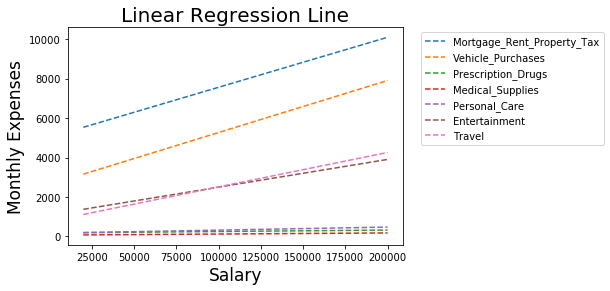

In [79]:
x_vals = np.array([20000,200000])
for index, row in coefficients_df_new.iterrows():
    lineargraph(row['slope'], row['intercept'],row['category'], x_vals)
    
